In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Sheart\Sheart_C_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.0,70.0,4.0,130.0,322.0,NaN,NaN,109.0,0.0,2.4,2.0,3.0,3.0
1,NaN,67.0,3.0,115.0,564.0,0.0,2.0,NaN,0.0,1.6,2.0,0.0,7.0
2,1.0,57.0,2.0,124.0,261.0,0.0,0.0,141.0,NaN,0.3,NaN,0.0,7.0
3,1.0,64.0,4.0,128.0,NaN,NaN,NaN,105.0,1.0,0.2,2.0,1.0,7.0
4,NaN,NaN,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.0,52.0,NaN,172.0,199.0,NaN,NaN,162.0,0.0,0.5,1.0,0.0,NaN
266,1.0,44.0,2.0,NaN,263.0,0.0,0.0,173.0,NaN,NaN,1.0,0.0,7.0
267,0.0,56.0,2.0,NaN,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0
268,1.0,57.0,4.0,140.0,192.0,NaN,NaN,148.0,0.0,0.4,2.0,0.0,6.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	59
float64		column 2	67
float64		column 3	52
float64		column 4	55
float64		column 5	54
float64		column 6	52
float64		column 7	52
float64		column 8	48
float64		column 9	52
float64		column 10	51
float64		column 11	46
float64		column 12	57
float64		column 13	57


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,211.000000,203.000000,218.000000,215.000000,216.000000,218.000000,218.000000,222.000000,218.000000,219.000000,224.00000,213.00000,213.000000
mean,0.677725,54.866995,3.188073,131.758140,248.712963,0.133028,1.022936,150.792793,0.334862,1.023744,1.59375,0.71831,4.769953
std,0.468459,9.129814,0.953502,18.145752,53.314870,0.340386,0.999736,22.613061,0.473029,1.124572,0.59907,0.95931,1.951931
min,0.000000,34.000000,1.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,1.00000,0.00000,3.000000
25%,0.000000,48.000000,3.000000,120.000000,211.000000,0.000000,0.000000,138.000000,0.000000,0.000000,1.00000,0.00000,3.000000
50%,1.000000,55.000000,3.000000,130.000000,243.500000,0.000000,2.000000,155.000000,0.000000,0.800000,2.00000,0.00000,3.000000
75%,1.000000,62.000000,4.000000,140.000000,278.000000,0.000000,2.000000,168.000000,1.000000,1.600000,2.00000,1.00000,7.000000
max,1.000000,77.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,5.600000,3.00000,3.00000,7.000000


<AxesSubplot:>

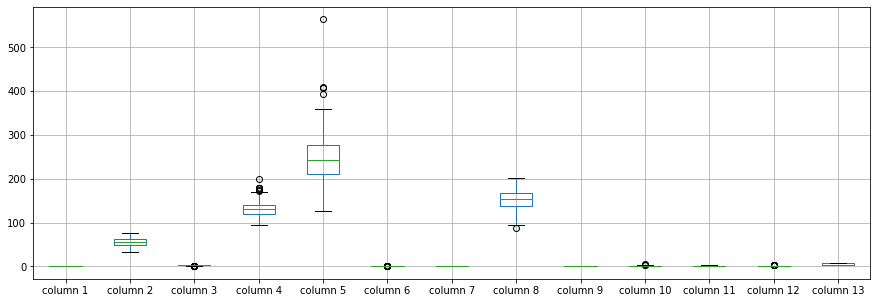

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.677725
column 2      54.866995
column 3       3.188073
column 4     131.758140
column 5     248.712963
column 6       0.133028
column 7       1.022936
column 8     150.792793
column 9       0.334862
column 10      1.023744
column 11      1.593750
column 12      0.718310
column 13      4.769953
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,-0.038755,0.081326,-0.035738,-0.140996,0.004306,0.113165,-0.064003,0.208213,0.091004,0.003539,0.100647,0.436357
column 2,-0.038755,1.000000,0.118279,0.299445,0.208137,0.123322,0.273976,-0.433762,0.173713,0.053478,0.155560,0.378564,0.117664
column 3,0.081326,0.118279,1.000000,0.018464,0.098084,-0.096728,0.087225,-0.304494,0.345859,0.211220,0.111345,0.259010,0.354792
column 4,-0.035738,0.299445,0.018464,1.000000,0.157231,0.128498,0.123061,-0.108960,0.118103,0.307273,0.146724,0.133700,0.123463
column 5,-0.140996,0.208137,0.098084,0.157231,1.000000,-0.003445,0.173708,-0.058129,0.048411,0.098223,0.047917,0.082731,0.032891
column 6,0.004306,0.123322,-0.096728,0.128498,-0.003445,1.000000,0.094814,-0.052673,-0.041303,-0.008193,0.127865,0.087406,-0.024648
column 7,0.113165,0.273976,0.087225,0.123061,0.173708,0.094814,1.000000,-0.109075,0.166463,0.025780,0.129557,0.130068,-0.018632
column 8,-0.064003,-0.433762,-0.304494,-0.108960,-0.058129,-0.052673,-0.109075,1.000000,-0.392716,-0.297438,-0.390408,-0.227595,-0.339283
column 9,0.208213,0.173713,0.345859,0.118103,0.048411,-0.041303,0.166463,-0.392716,1.000000,0.314419,0.229130,0.156779,0.373955
column 10,0.091004,0.053478,0.211220,0.307273,0.098223,-0.008193,0.025780,-0.297438,0.314419,1.000000,0.543938,0.223651,0.260899


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+107,13+107+107,13+107+107+107,13+107+107+107+107,13+107+107+107+107+107,13+107+107+107+107,13+107+107+107,13+107+107,13+107,13], vae_layer = False, seed = 107)
imputer.build_model(df)
imputer.train_model(training_epochs=50)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 489.3252429962158
Epoch: 1 , loss: 490.34252738952637
Epoch: 2 , loss: 487.8581657409668
Epoch: 3 , loss: 489.150146484375
Epoch: 4 , loss: 492.5571537017822
Epoch: 5 , loss: 486.45532989501953
Epoch: 6 , loss: 491.4576892852783
Epoch: 7 , loss: 490.296443939209
Epoch: 8 , loss: 487.08031845092773
Epoch: 9 , loss: 484.54062271118164
Epoch: 10 , loss: 483.8516540527344
Epoch: 11 , loss: 484.94801330566406
Epoch: 12 , loss: 485.74778175354004
Epoch: 13 , loss: 481.21568298339844
Epoch: 14 , loss: 483.11081886291504
Epoch: 15 , loss: 482.222749710083
Epoch: 16 , loss: 479.3963985443115
Epoch: 17 , loss: 480.2270812988281
Epoch: 18 , loss: 480.5782070159912
Epoch: 19 , loss: 479.0772705078125
Epoch: 20 , loss: 480.1713066101074
Epoch: 21 , loss: 478.43992805480957
Epoch: 22 , loss: 470.33951568603516
Epoch: 23 , loss: 470.9594078063965
Epoch: 24 , loss: 455.38235664367676
Epoch: 25 , loss: 436.677484512329

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(270, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1       1.000000
column 2      56.057766
column 3       4.206125
column 4     130.000000
column 5     245.000000
column 6       0.000000
column 7       2.000000
column 8     180.000000
column 9       0.000000
column 10      0.200000
column 11      2.000000
column 12      0.000000
column 13      3.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Sheart.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.000000,0.000000,0.000000,0.000000,0.000000,-0.133790,-1.610217,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,0.441599,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-108.160099,0.000000,0.000000,0.000000,0.0,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.082840,0.000000,-0.329703,0.0,0.000000
3,0.000000,0.000000,0.000000,0.000000,-54.733612,-0.006530,0.917994,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
4,0.245121,-35.101589,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.000000,0.000000,-0.440773,0.000000,0.000000,-0.918210,0.780670,0.000000,0.000000,0.000000,0.000000,0.0,-3.742141
266,0.000000,0.000000,0.000000,36.497742,0.000000,0.000000,0.000000,0.000000,0.376453,2.478592,0.000000,0.0,0.000000
267,0.000000,0.000000,0.000000,-101.230698,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
268,0.000000,0.000000,0.000000,0.000000,0.000000,-0.064886,0.821416,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(1330.9001756634357, 5414.752392307519)

In [17]:
NRMS=numerator/denominator
NRMS


0.24579151164034432

In [18]:
new_df.iloc[66,:]

column 1       1.000000
column 2      51.000000
column 3       4.000000
column 4     140.000000
column 5     224.418823
column 6       0.000000
column 7       2.000000
column 8     186.000000
column 9       1.000000
column 10      1.400368
column 11      1.000000
column 12      0.000000
column 13      3.000000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.000000,70.000000,4.000000,130.000000,322.000000,-0.133790,0.389783,109.000000,0.000000,2.400000,2.000000,3.0,3.000000
1,0.441599,67.000000,3.000000,115.000000,564.000000,0.000000,2.000000,51.839901,0.000000,1.600000,2.000000,0.0,7.000000
2,1.000000,57.000000,2.000000,124.000000,261.000000,0.000000,0.000000,141.000000,0.082840,0.300000,0.670297,0.0,7.000000
3,1.000000,64.000000,4.000000,128.000000,208.266388,-0.006530,0.917994,105.000000,1.000000,0.200000,2.000000,1.0,7.000000
4,0.245121,38.898411,2.000000,120.000000,269.000000,0.000000,2.000000,121.000000,1.000000,0.200000,1.000000,1.0,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.000000,52.000000,2.559227,172.000000,199.000000,0.081790,0.780670,162.000000,0.000000,0.500000,1.000000,0.0,3.257859
266,1.000000,44.000000,2.000000,156.497742,263.000000,0.000000,0.000000,173.000000,0.376453,2.478592,1.000000,0.0,7.000000
267,0.000000,56.000000,2.000000,38.769302,294.000000,0.000000,2.000000,153.000000,0.000000,1.300000,2.000000,0.0,3.000000
268,1.000000,57.000000,4.000000,140.000000,192.000000,-0.064886,0.821416,148.000000,0.000000,0.400000,2.000000,0.0,6.000000


In [20]:
imputations[-1].to_excel("Sheart_C_20(imp).xlsx", index=False, header=False)